<a href="https://colab.research.google.com/github/bsebast2/AppliedMLProject/blob/main/Applied_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied ML Project: Financial Distress Prediction Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import streamlit as st
%matplotlib inline
    


## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Dataset


In [ ]:
df = pd.read_csv('/content/Financial Distress.csv')
df 

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,0.182790,0.006449,0.85822,2.005800e+00,0.125460,6.97060,4.65120,0.050100,2.1984,0.018265,0.024978,0.027264,1.41730,9.5554,0.148720,0.66995,214.760,12.641,6.46070,0.043835,0.204590,0.35179,8.316100,0.28922,0.76606,2.5825,77.400,0.026722,1.630700,...,0.180160,1.50060,0.026224,7.05130,1174.90,5.33990,0.851280,12.837,0.061737,0.180900,209.87,-0.582550,0.471010,0.109900,0.000000,0.000000,0.22009,7.12410,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,0.035991,0.001795,0.85152,-4.864400e-01,0.179330,4.57640,3.75210,-0.014011,2.4575,0.027558,0.028804,0.041102,1.18010,7.2952,0.056026,0.67048,38.242,12.877,5.55060,0.265480,0.150190,0.41763,9.527600,0.41561,0.81699,2.6033,95.947,0.007580,0.837540,...,0.046857,1.00950,0.007864,4.60220,1062.50,3.73890,0.943970,12.881,-0.000565,0.056298,250.14,-0.474770,0.385990,0.369330,0.000000,0.000000,0.00000,7.41660,7.10500,14.32100,18.7700,124.7600,26.124,11.8,8322.8,0.1896,15.6,24.579,0.0,36.0,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,-0.765400,-0.054324,0.89314,4.122000e-01,0.077578,11.89000,2.48840,0.028077,1.3957,0.012595,0.068116,0.014847,0.81652,7.1204,0.065220,0.84827,-498.390,13.225,16.25400,0.416570,0.074149,0.36723,9.351300,0.50356,0.91962,1.4931,144.670,-0.066483,0.955790,...,-0.579760,0.57832,-0.064373,11.98800,651.15,10.93400,0.934780,12.909,0.041625,0.047562,280.55,-1.000000,0.488440,0.053299,0.003785,0.005191,0.00000,3.63730,7.02130,1.15380,9.8951,6.4467,30.245,10.3,8747.0,11.9460,15.2,20.700,0.0,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.107910,-0.065316,0.89581,9.949000e-01,0.141120,6.08620,1.63820,0.093904,2.0588,0.011601,0.094385,0.014415,0.90391,7.9828,0.125160,0.80478,-75.867,13.305,8.89500,0.083774,0.054098,0.54360,7.090900,0.67133,0.93701,2.3533,219.750,-0.017000,0.383350,...,-0.150130,0.64508,-0.017731,6.11140,703.04,5.70280,0.874840,13.094,0.108400,0.101350,413.74,0.565000,0.344080,0.073356,0.000037,0.000045,0.00000,5.14420,9.90990,2.04080,-1.4903,-21.9070,34.285,11.5,9042.5,-18.7480,10.4,47.429,4.0,33.0,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,0.577250,0.094075,0.81549,3.014700e+00,0.185400,4.39380,1.61690,0.239210,3.0311,0.006814,0.079346,0.008876,1.02510,4.7463,0.266020,0.76770,1423.100,11.575,17.48800,0.620770,0.046907,0.56963,9.486100,0.68143,0.94242,4.1296,222.650,0.131230,0.253010,...,0.607660,0.25782,0.131380,4.41510,2465.40,4.14080,0.733980,11.396,0.250310,0.222370,315.34,-0.060101,0.202420,1.229100,-0.002491,-0.002980,0.22688,7.12410,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,1.091500,0.241640,0.226860,0.35580,1.550000e+07,0.839630,0.19101,12.09200,0.946730,8.1062,0.014077,0.000000,0.089439,0.52242,2.51

Checking for DF

In [ ]:
#bentic 
df

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,0.182790,0.006449,0.85822,2.005800e+00,0.125460,6.97060,4.65120,0.050100,2.1984,0.018265,0.024978,0.027264,1.41730,9.5554,0.148720,0.66995,214.760,12.641,6.46070,0.043835,0.204590,0.35179,8.316100,0.28922,0.76606,2.5825,77.400,0.026722,1.630700,...,0.180160,1.50060,0.026224,7.05130,1174.90,5.33990,0.851280,12.837,0.061737,0.180900,209.87,-0.582550,0.471010,0.109900,0.000000,0.000000,0.22009,7.12410,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,0.035991,0.001795,0.85152,-4.864400e-01,0.179330,4.57640,3.75210,-0.014011,2.4575,0.027558,0.028804,0.041102,1.18010,7.2952,0.056026,0.67048,38.242,12.877,5.55060,0.265480,0.150190,0.41763,9.527600,0.41561,0.81699,2.6033,95.947,0.007580,0.837540,...,0.046857,1.00950,0.007864,4.60220,1062.50,3.73890,0.943970,12.881,-0.000565,0.056298,250.14,-0.474770,0.385990,0.369330,0.000000,0.000000,0.00000,7.41660,7.10500,14.32100,18.7700,124.7600,26.124,11.8,8322.8,0.1896,15.6,24.579,0.0,36.0,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,-0.765400,-0.054324,0.89314,4.122000e-01,0.077578,11.89000,2.48840,0.028077,1.3957,0.012595,0.068116,0.014847,0.81652,7.1204,0.065220,0.84827,-498.390,13.225,16.25400,0.416570,0.074149,0.36723,9.351300,0.50356,0.91962,1.4931,144.670,-0.066483,0.955790,...,-0.579760,0.57832,-0.064373,11.98800,651.15,10.93400,0.934780,12.909,0.041625,0.047562,280.55,-1.000000,0.488440,0.053299,0.003785,0.005191,0.00000,3.63730,7.02130,1.15380,9.8951,6.4467,30.245,10.3,8747.0,11.9460,15.2,20.700,0.0,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.107910,-0.065316,0.89581,9.949000e-01,0.141120,6.08620,1.63820,0.093904,2.0588,0.011601,0.094385,0.014415,0.90391,7.9828,0.125160,0.80478,-75.867,13.305,8.89500,0.083774,0.054098,0.54360,7.090900,0.67133,0.93701,2.3533,219.750,-0.017000,0.383350,...,-0.150130,0.64508,-0.017731,6.11140,703.04,5.70280,0.874840,13.094,0.108400,0.101350,413.74,0.565000,0.344080,0.073356,0.000037,0.000045,0.00000,5.14420,9.90990,2.04080,-1.4903,-21.9070,34.285,11.5,9042.5,-18.7480,10.4,47.429,4.0,33.0,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,0.577250,0.094075,0.81549,3.014700e+00,0.185400,4.39380,1.61690,0.239210,3.0311,0.006814,0.079346,0.008876,1.02510,4.7463,0.266020,0.76770,1423.100,11.575,17.48800,0.620770,0.046907,0.56963,9.486100,0.68143,0.94242,4.1296,222.650,0.131230,0.253010,...,0.607660,0.25782,0.131380,4.41510,2465.40,4.14080,0.733980,11.396,0.250310,0.222370,315.34,-0.060101,0.202420,1.229100,-0.002491,-0.002980,0.22688,7.12410,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,1.091500,0.241640,0.226860,0.35580,1.550000e+07,0.839630,0.19101,12.09200,0.946730,8.1062,0.014077,0.000000,0.089439,0.52242,2.51

In [ ]:
# Kuthuru
df

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,0.182790,0.006449,0.85822,2.005800e+00,0.125460,6.97060,4.65120,0.050100,2.1984,0.018265,0.024978,0.027264,1.41730,9.5554,0.148720,0.66995,214.760,12.641,6.46070,0.043835,0.204590,0.35179,8.316100,0.28922,0.76606,2.5825,77.400,0.026722,1.630700,...,0.180160,1.50060,0.026224,7.05130,1174.90,5.33990,0.851280,12.837,0.061737,0.180900,209.87,-0.582550,0.471010,0.109900,0.000000,0.000000,0.22009,7.12410,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,0.035991,0.001795,0.85152,-4.864400e-01,0.179330,4.57640,3.75210,-0.014011,2.4575,0.027558,0.028804,0.041102,1.18010,7.2952,0.056026,0.67048,38.242,12.877,5.55060,0.265480,0.150190,0.41763,9.527600,0.41561,0.81699,2.6033,95.947,0.007580,0.837540,...,0.046857,1.00950,0.007864,4.60220,1062.50,3.73890,0.943970,12.881,-0.000565,0.056298,250.14,-0.474770,0.385990,0.369330,0.000000,0.000000,0.00000,7.41660,7.10500,14.32100,18.7700,124.7600,26.124,11.8,8322.8,0.1896,15.6,24.579,0.0,36.0,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,-0.765400,-0.054324,0.89314,4.122000e-01,0.077578,11.89000,2.48840,0.028077,1.3957,0.012595,0.068116,0.014847,0.81652,7.1204,0.065220,0.84827,-498.390,13.225,16.25400,0.416570,0.074149,0.36723,9.351300,0.50356,0.91962,1.4931,144.670,-0.066483,0.955790,...,-0.579760,0.57832,-0.064373,11.98800,651.15,10.93400,0.934780,12.909,0.041625,0.047562,280.55,-1.000000,0.488440,0.053299,0.003785,0.005191,0.00000,3.63730,7.02130,1.15380,9.8951,6.4467,30.245,10.3,8747.0,11.9460,15.2,20.700,0.0,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.107910,-0.065316,0.89581,9.949000e-01,0.141120,6.08620,1.63820,0.093904,2.0588,0.011601,0.094385,0.014415,0.90391,7.9828,0.125160,0.80478,-75.867,13.305,8.89500,0.083774,0.054098,0.54360,7.090900,0.67133,0.93701,2.3533,219.750,-0.017000,0.383350,...,-0.150130,0.64508,-0.017731,6.11140,703.04,5.70280,0.874840,13.094,0.108400,0.101350,413.74,0.565000,0.344080,0.073356,0.000037,0.000045,0.00000,5.14420,9.90990,2.04080,-1.4903,-21.9070,34.285,11.5,9042.5,-18.7480,10.4,47.429,4.0,33.0,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,0.577250,0.094075,0.81549,3.014700e+00,0.185400,4.39380,1.61690,0.239210,3.0311,0.006814,0.079346,0.008876,1.02510,4.7463,0.266020,0.76770,1423.100,11.575,17.48800,0.620770,0.046907,0.56963,9.486100,0.68143,0.94242,4.1296,222.650,0.131230,0.253010,...,0.607660,0.25782,0.131380,4.41510,2465.40,4.14080,0.733980,11.396,0.250310,0.222370,315.34,-0.060101,0.202420,1.229100,-0.002491,-0.002980,0.22688,7.12410,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,1.091500,0.241640,0.226860,0.35580,1.550000e+07,0.839630,0.19101,12.09200,0.946730,8.1062,0.014077,0.000000,0.089439,0.52242,2.51

In [ ]:
# Navneeth
df

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,0.182790,0.006449,0.85822,2.005800e+00,0.125460,6.97060,4.65120,0.050100,2.1984,0.018265,0.024978,0.027264,1.41730,9.5554,0.148720,0.66995,214.760,12.641,6.46070,0.043835,0.204590,0.35179,8.316100,0.28922,0.76606,2.5825,77.400,0.026722,1.630700,...,0.180160,1.50060,0.026224,7.05130,1174.90,5.33990,0.851280,12.837,0.061737,0.180900,209.87,-0.582550,0.471010,0.109900,0.000000,0.000000,0.22009,7.12410,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,0.035991,0.001795,0.85152,-4.864400e-01,0.179330,4.57640,3.75210,-0.014011,2.4575,0.027558,0.028804,0.041102,1.18010,7.2952,0.056026,0.67048,38.242,12.877,5.55060,0.265480,0.150190,0.41763,9.527600,0.41561,0.81699,2.6033,95.947,0.007580,0.837540,...,0.046857,1.00950,0.007864,4.60220,1062.50,3.73890,0.943970,12.881,-0.000565,0.056298,250.14,-0.474770,0.385990,0.369330,0.000000,0.000000,0.00000,7.41660,7.10500,14.32100,18.7700,124.7600,26.124,11.8,8322.8,0.1896,15.6,24.579,0.0,36.0,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,-0.765400,-0.054324,0.89314,4.122000e-01,0.077578,11.89000,2.48840,0.028077,1.3957,0.012595,0.068116,0.014847,0.81652,7.1204,0.065220,0.84827,-498.390,13.225,16.25400,0.416570,0.074149,0.36723,9.351300,0.50356,0.91962,1.4931,144.670,-0.066483,0.955790,...,-0.579760,0.57832,-0.064373,11.98800,651.15,10.93400,0.934780,12.909,0.041625,0.047562,280.55,-1.000000,0.488440,0.053299,0.003785,0.005191,0.00000,3.63730,7.02130,1.15380,9.8951,6.4467,30.245,10.3,8747.0,11.9460,15.2,20.700,0.0,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.107910,-0.065316,0.89581,9.949000e-01,0.141120,6.08620,1.63820,0.093904,2.0588,0.011601,0.094385,0.014415,0.90391,7.9828,0.125160,0.80478,-75.867,13.305,8.89500,0.083774,0.054098,0.54360,7.090900,0.67133,0.93701,2.3533,219.750,-0.017000,0.383350,...,-0.150130,0.64508,-0.017731,6.11140,703.04,5.70280,0.874840,13.094,0.108400,0.101350,413.74,0.565000,0.344080,0.073356,0.000037,0.000045,0.00000,5.14420,9.90990,2.04080,-1.4903,-21.9070,34.285,11.5,9042.5,-18.7480,10.4,47.429,4.0,33.0,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,0.577250,0.094075,0.81549,3.014700e+00,0.185400,4.39380,1.61690,0.239210,3.0311,0.006814,0.079346,0.008876,1.02510,4.7463,0.266020,0.76770,1423.100,11.575,17.48800,0.620770,0.046907,0.56963,9.486100,0.68143,0.94242,4.1296,222.650,0.131230,0.253010,...,0.607660,0.25782,0.131380,4.41510,2465.40,4.14080,0.733980,11.396,0.250310,0.222370,315.34,-0.060101,0.202420,1.229100,-0.002491,-0.002980,0.22688,7.12410,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,1.091500,0.241640,0.226860,0.35580,1.550000e+07,0.839630,0.19101,12.09200,0.946730,8.1062,0.014077,0.000000,0.089439,0.52242,2.51

In [ ]:
df.head(20)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.28100,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,0.182790,0.006449,0.85822,2.005800,0.125460,6.97060,4.6512,0.050100,2.1984,0.018265,0.024978,0.027264,1.41730,9.5554,0.148720,0.66995,214.760,12.641,6.4607,0.043835,0.204590,0.35179,8.3161,0.28922,0.76606,2.5825,77.400,0.026722,1.630700,...,0.180160,1.50060,0.026224,7.05130,1174.90,5.33990,0.85128,12.837,0.061737,0.180900,209.87,-0.582550,0.47101,0.109900,0.000000,0.000000,0.22009,7.124100,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.4760,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.27000,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,0.035991,0.001795,0.85152,-0.486440,0.179330,4.57640,3.7521,-0.014011,2.4575,0.027558,0.028804,0.041102,1.18010,7.2952,0.056026,0.67048,38.242,12.877,5.5506,0.265480,0.150190,0.41763,9.5276,0.41561,0.81699,2.6033,95.947,0.007580,0.837540,...,0.046857,1.00950,0.007864,4.60220,1062.50,3.73890,0.94397,12.881,-0.000565,0.056298,250.14,-0.474770,0.38599,0.369330,0.000000,0.000000,0.00000,7.416600,7.10500,14.32100,18.7700,124.7600,26.124,11.8,8322.8,0.1896,15.6,24.5790,0.0,36.0,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.05290,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,-0.765400,-0.054324,0.89314,0.412200,0.077578,11.89000,2.4884,0.028077,1.3957,0.012595,0.068116,0.014847,0.81652,7.1204,0.065220,0.84827,-498.390,13.225,16.2540,0.416570,0.074149,0.36723,9.3513,0.50356,0.91962,1.4931,144.670,-0.066483,0.955790,...,-0.579760,0.57832,-0.064373,11.98800,651.15,10.93400,0.93478,12.909,0.041625,0.047562,280.55,-1.000000,0.48844,0.053299,0.003785,0.005191,0.00000,3.637300,7.02130,1.15380,9.8951,6.4467,30.245,10.3,8747.0,11.9460,15.2,20.7000,0.0,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.11310,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.107910,-0.065316,0.89581,0.994900,0.141120,6.08620,1.6382,0.093904,2.0588,0.011601,0.094385,0.014415,0.90391,7.9828,0.125160,0.80478,-75.867,13.305,8.8950,0.083774,0.054098,0.54360,7.0909,0.67133,0.93701,2.3533,219.750,-0.017000,0.383350,...,-0.150130,0.64508,-0.017731,6.11140,703.04,5.70280,0.87484,13.094,0.108400,0.101350,413.74,0.565000,0.34408,0.073356,0.000037,0.000045,0.00000,5.144200,9.90990,2.04080,-1.4903,-21.9070,34.285,11.5,9042.5,-18.7480,10.4,47.4290,4.0,33.0,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.06230,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,0.577250,0.094075,0.81549,3.014700,0.185400,4.39380,1.6169,0.239210,3.0311,0.006814,0.079346,0.008876,1.02510,4.7463,0.266020,0.76770,1423.100,11.575,17.4880,0.620770,0.046907,0.56963,9.4861,0.68143,0.94242,4.1296,222.650,0.131230,0.253010,...,0.607660,0.25782,0.131380,4.41510,2465.40,4.14080,0.73398,11.396,0.250310,0.222370,315.34,-0.060101,0.20242,1.229100,-0.002491,-0.002980,0.22688,7.124100,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.4760,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
5,2,2,0.007188,1.05580,0.081916,0.87949,0.68673,0.142630,0.043102,0.77198,0.119280,0.679730,0.063605,0.81574,2.364600,0.120510,7.29780,1.2609,0.207690,2.9089,0.012307,0.087834,0.015929,0.84185,3.8821,0.239880,0.77264,1748.000,12.048,15.9330,0.604710,0.106850,0.59646,5.5914,0.86856,0.87851,3.8269,285.500,0.100420,0.886600,...,0.463080,0.35765,0.093141,7.33560,2571.60,6.41120,0.76012,11.672,0.223940,0.164730,412.79,0.102450,0.17945,0.611770,-0.011241,-0.016369,0.22445,7.416600,7.10500,14.32100,18.7700,124.7600,26.124,11.8,8322.8,0.1896,15.6,24.5790,0.0,36.0,107.090,3

In [ ]:
df.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3.672000e+03,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3.672000e+03,3.672000e+03,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,39.274361,0.332610,0.136263,0.638835,1.252730e+05,0.384230,2.438322,8.185969e+03,-25.039036,2.058577e+03,0.041380,77.549137,0.103999,1.449663,1.419506e+01,0.273236,0.532118,996.000716,13.288179,-77.482669,0.202575,0.083651,0.354824,3.580871e+05,379.867463,0.863141,2.859282e+03,6.887839e+04,0.240324,0.312063,...,3.321408,0.149245,0.298761,1.490890e+03,2484.105343,2.126260,0.726764,12.929332,-21.252442,0.207304,3411.267857,0.007702,0.237413,1.027090,-0.010018,-6.869395,0.113802,2.694738,3.456374,1.299225,-0.703818,31.677402,28.245979,11.459051,15874.639434,21.472377,17.863013,23.301360,1.923501,30.407166,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,4305.688039,0.346135,0.138978,0.201986,1.468207e+06,0.177904,2.377307,1.086725e+05,1231.623609,6.022926e+04,0.045379,3256.469121,0.231024,0.968705,2.272613e+02,0.171174,0.182469,1822.605137,1.614000,4759.884902,0.285898,0.092991,0.170703,8.275936e+06,10444.296575,0.140751,7.633068e+04,2.337751e+06,0.294840,0.504356,...,58.382438,0.764287,0.712088,4.558637e+04,2927.820444,2.162011,0.171174,1.761527,1209.468675,0.130165,14441.801918,0.416617,0.139899,25.636779,0.026567,290.276732,0.089494,3.922626,6.953459,8.738037,12.321989,43.852586,6.146999,0.952858,10026.105024,97.191938,7.119361,17.834175,1.469196,3.714512,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,-145000.000000,-3.611200,-0.318660,0.021491,-2.620000e+06,0.032101,0.016400,3.540000e-06,-35758.000000,0.000000e+00,0.000102,0.000000,0.000127,0.000003,7.730000e-07,-0.553850,0.016135,-3374.600000,8.195100,-288000.000000,-0.499440,0.000000,0.002082,0.000000e+00,0.010060,0.049372,4.560000e-05,0.000000e+00,-4.856200,0.000000,...,-56.719000,-9.376900,-1.074900,1.640100e-02,533.070000,0.016400,0.000000,0.000000,-33563.000000,-0.225220,0.010753,-1.000000,0.000000,-0.998710,-0.279260,-15649.000000,-0.349060,-7.714000,-11.824000,-25.736000,-21.411000,-21.907000,15.916000,10.300000,7941.800000,-58.122000,10.400000,-10.665000,0.000000,22.000000,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,0.056185,0.157677,0.033820,0.503125,1.882775e+00,0.250575,1.007550,2.294750e+00,0.088584,1.678475e+00,0.013266,0.013259,

In [ ]:
df1 = df.iloc[:, 2:]
df1

,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,0.182790,0.006449,0.85822,2.005800e+00,0.125460,6.97060,4.65120,0.050100,2.1984,0.018265,0.024978,0.027264,1.41730,9.5554,0.148720,0.66995,214.760,12.641,6.46070,0.043835,0.204590,0.35179,8.316100,0.28922,0.76606,2.5825,77.400,0.026722,1.630700,0.015016,0.005478,...,0.180160,1.50060,0.026224,7.05130,1174.90,5.33990,0.851280,12.837,0.061737,0.180900,209.87,-0.582550,0.471010,0.109900,0.000000,0.000000,0.22009,7.12410,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,0.035991,0.001795,0.85152,-4.864400e-01,0.179330,4.57640,3.75210,-0.014011,2.4575,0.027558,0.028804,0.041102,1.18010,7.2952,0.056026,0.67048,38.242,12.877,5.55060,0.265480,0.150190,0.41763,9.527600,0.41561,0.81699,2.6033,95.947,0.007580,0.837540,0.027425,0.045434,...,0.046857,1.00950,0.007864,4.60220,1062.50,3.73890,0.943970,12.881,-0.000565,0.056298,250.14,-0.474770,0.385990,0.369330,0.000000,0.000000,0.00000,7.41660,7.10500,14.32100,18.7700,124.7600,26.124,11.8,8322.8,0.1896,15.6,24.579,0.0,36.0,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,-0.765400,-0.054324,0.89314,4.122000e-01,0.077578,11.89000,2.48840,0.028077,1.3957,0.012595,0.068116,0.014847,0.81652,7.1204,0.065220,0.84827,-498.390,13.225,16.25400,0.416570,0.074149,0.36723,9.351300,0.50356,0.91962,1.4931,144.670,-0.066483,0.955790,0.017270,0.028059,...,-0.579760,0.57832,-0.064373,11.98800,651.15,10.93400,0.934780,12.909,0.041625,0.047562,280.55,-1.000000,0.488440,0.053299,0.003785,0.005191,0.00000,3.63730,7.02130,1.15380,9.8951,6.4467,30.245,10.3,8747.0,11.9460,15.2,20.700,0.0,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.107910,-0.065316,0.89581,9.949000e-01,0.141120,6.08620,1.63820,0.093904,2.0588,0.011601,0.094385,0.014415,0.90391,7.9828,0.125160,0.80478,-75.867,13.305,8.89500,0.083774,0.054098,0.54360,7.090900,0.67133,0.93701,2.3533,219.750,-0.017000,0.383350,0.014327,0.203370,...,-0.150130,0.64508,-0.017731,6.11140,703.04,5.70280,0.874840,13.094,0.108400,0.101350,413.74,0.565000,0.344080,0.073356,0.000037,0.000045,0.00000,5.14420,9.90990,2.04080,-1.4903,-21.9070,34.285,11.5,9042.5,-18.7480,10.4,47.429,4.0,33.0,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,0.577250,0.094075,0.81549,3.014700e+00,0.185400,4.39380,1.61690,0.239210,3.0311,0.006814,0.079346,0.008876,1.02510,4.7463,0.266020,0.76770,1423.100,11.575,17.48800,0.620770,0.046907,0.56963,9.486100,0.68143,0.94242,4.1296,222.650,0.131230,0.253010,0.008152,0.353010,...,0.607660,0.25782,0.131380,4.41510,2465.40,4.14080,0.733980,11.396,0.250310,0.222370,315.34,-0.060101,0.202420,1.229100,-0.002491,-0.002980,0.22688,7.12410,15.38100,3.27020,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,1.091500,0.241640,0.226860,0.35580,1.550000e+07,0.839630,0.19101,12.092

In [ ]:
df1.describe()

,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3.672000e+03,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3.672000e+03,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,39.274361,0.332610,0.136263,0.638835,1.252730e+05,0.384230,2.438322,8.185969e+03,-25.039036,2.058577e+03,0.041380,77.549137,0.103999,1.449663,1.419506e+01,0.273236,0.532118,996.000716,13.288179,-77.482669,0.202575,0.083651,0.354824,3.580871e+05,379.867463,0.863141,2.859282e+03,6.887839e+04,0.240324,0.312063,15.149440,120.237901,...,3.321408,0.149245,0.298761,1.490890e+03,2484.105343,2.126260,0.726764,12.929332,-21.252442,0.207304,3411.267857,0.007702,0.237413,1.027090,-0.010018,-6.869395,0.113802,2.694738,3.456374,1.299225,-0.703818,31.677402,28.245979,11.459051,15874.639434,21.472377,17.863013,23.301360,1.923501,30.407166,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,4305.688039,0.346135,0.138978,0.201986,1.468207e+06,0.177904,2.377307,1.086725e+05,1231.623609,6.022926e+04,0.045379,3256.469121,0.231024,0.968705,2.272613e+02,0.171174,0.182469,1822.605137,1.614000,4759.884902,0.285898,0.092991,0.170703,8.275936e+06,10444.296575,0.140751,7.633068e+04,2.337751e+06,0.294840,0.504356,420.164266,5128.434481,...,58.382438,0.764287,0.712088,4.558637e+04,2927.820444,2.162011,0.171174,1.761527,1209.468675,0.130165,14441.801918,0.416617,0.139899,25.636779,0.026567,290.276732,0.089494,3.922626,6.953459,8.738037,12.321989,43.852586,6.146999,0.952858,10026.105024,97.191938,7.119361,17.834175,1.469196,3.714512,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,-145000.000000,-3.611200,-0.318660,0.021491,-2.620000e+06,0.032101,0.016400,3.540000e-06,-35758.000000,0.000000e+00,0.000102,0.000000,0.000127,0.000003,7.730000e-07,-0.553850,0.016135,-3374.600000,8.195100,-288000.000000,-0.499440,0.000000,0.002082,0.000000e+00,0.010060,0.049372,4.560000e-05,0.000000e+00,-4.856200,0.000000,0.000244,-1.000000,...,-56.719000,-9.376900,-1.074900,1.640100e-02,533.070000,0.016400,0.000000,0.000000,-33563.000000,-0.225220,0.010753,-1.000000,0.000000,-0.998710,-0.279260,-15649.000000,-0.349060,-7.714000,-11.824000,-25.736000,-21.411000,-21.907000,15.916000,10.300000,7941.800000,-58.122000,10.400000,-10.665000,0.000000,22.000000,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,0.056185,0.157677,0.033820,0.503125,1.882775e+00,0.250575,1.007550,2.294750e+00,0.088584,1.678475e+00,0.013266,0.013259,0.024805,0.904230,1

In [ ]:
df1.isnull().values.any() # no null or missing values  

False

In [ ]:
# x1, x7, x8, x14, x16, x19, x21, x25, x27, x28, x32, x34,    

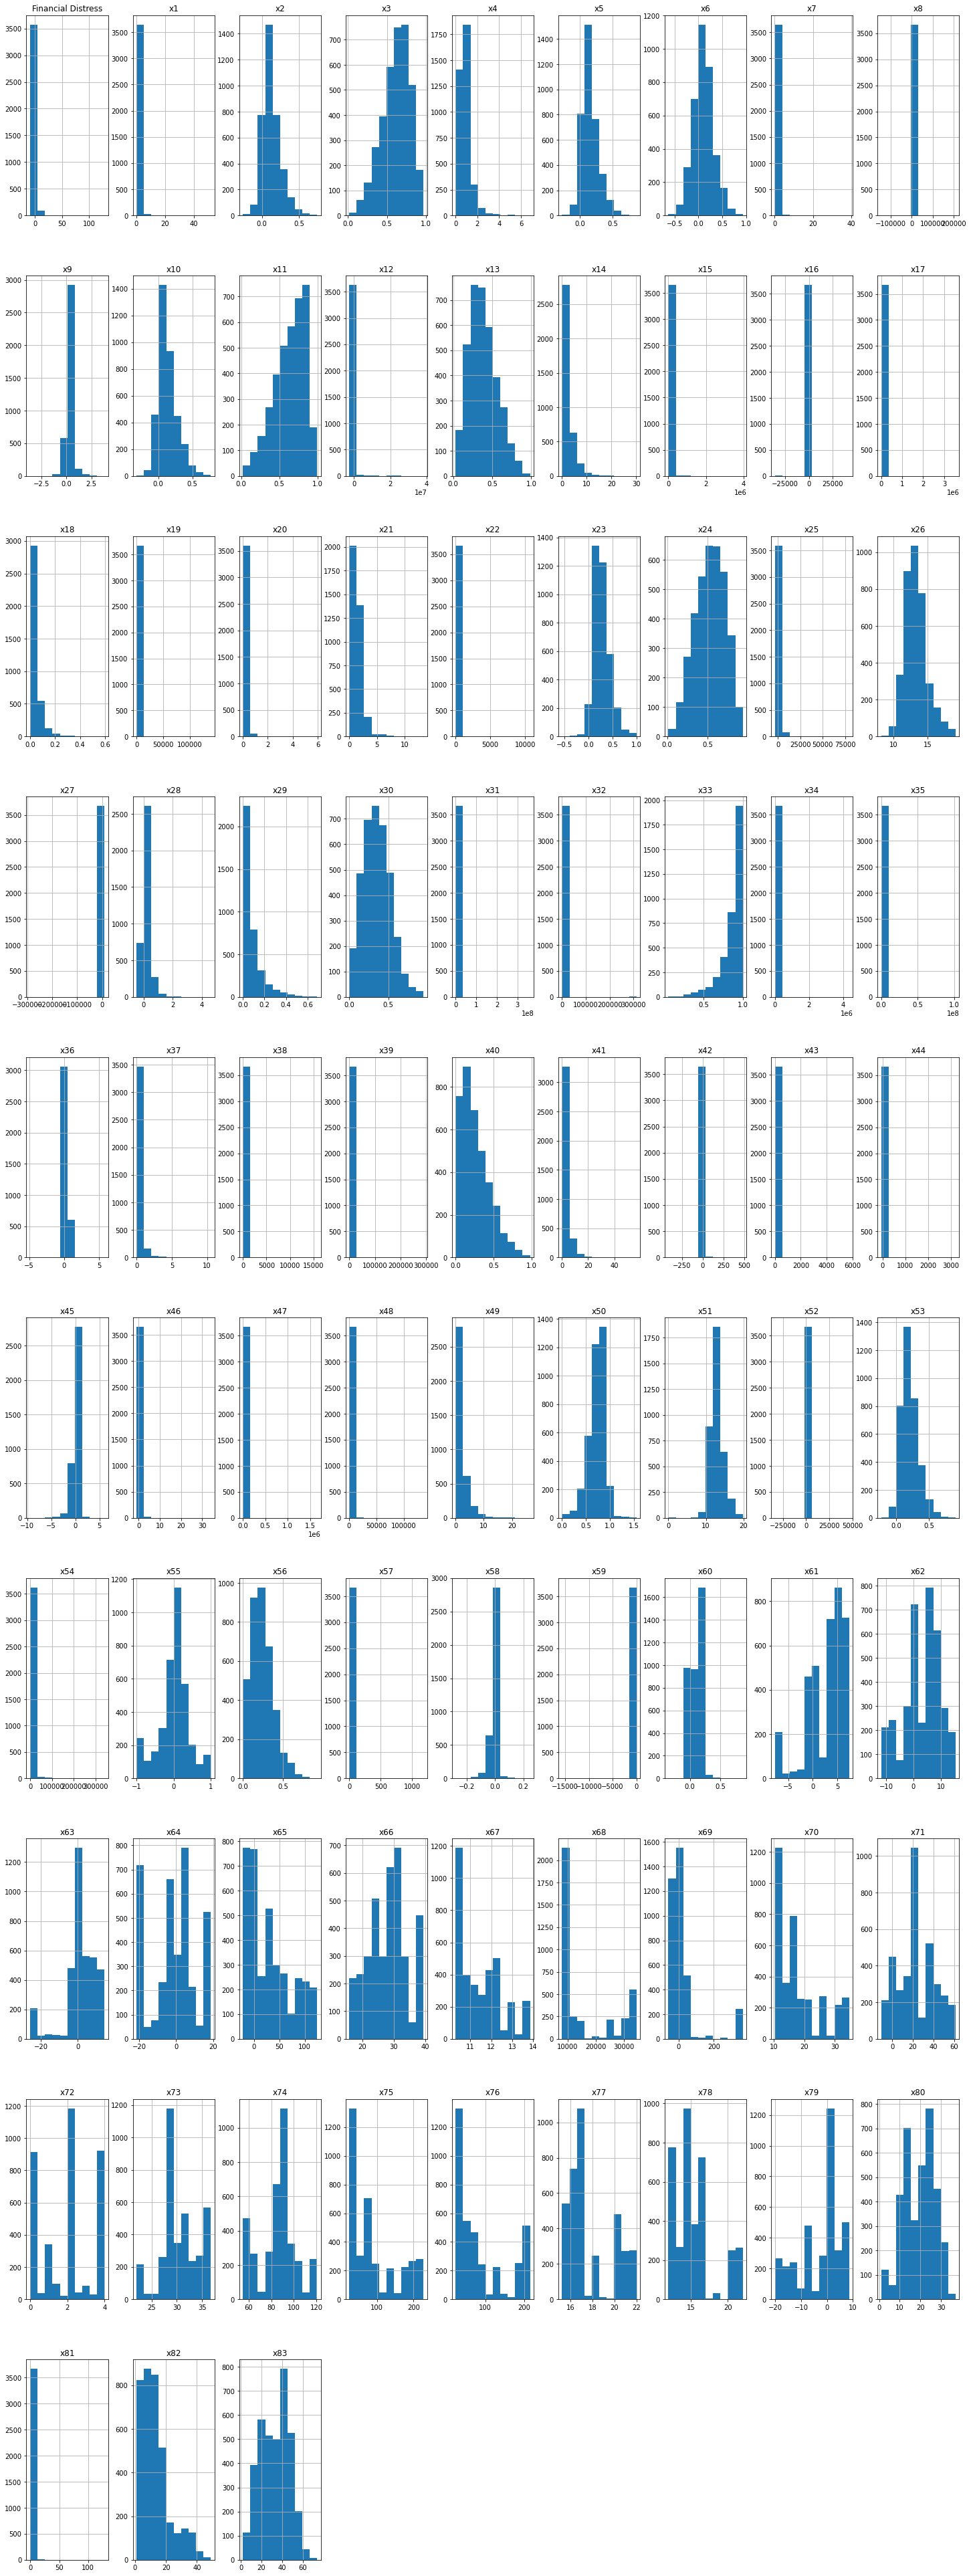

In [ ]:
df1.hist(figsize=(25,70));

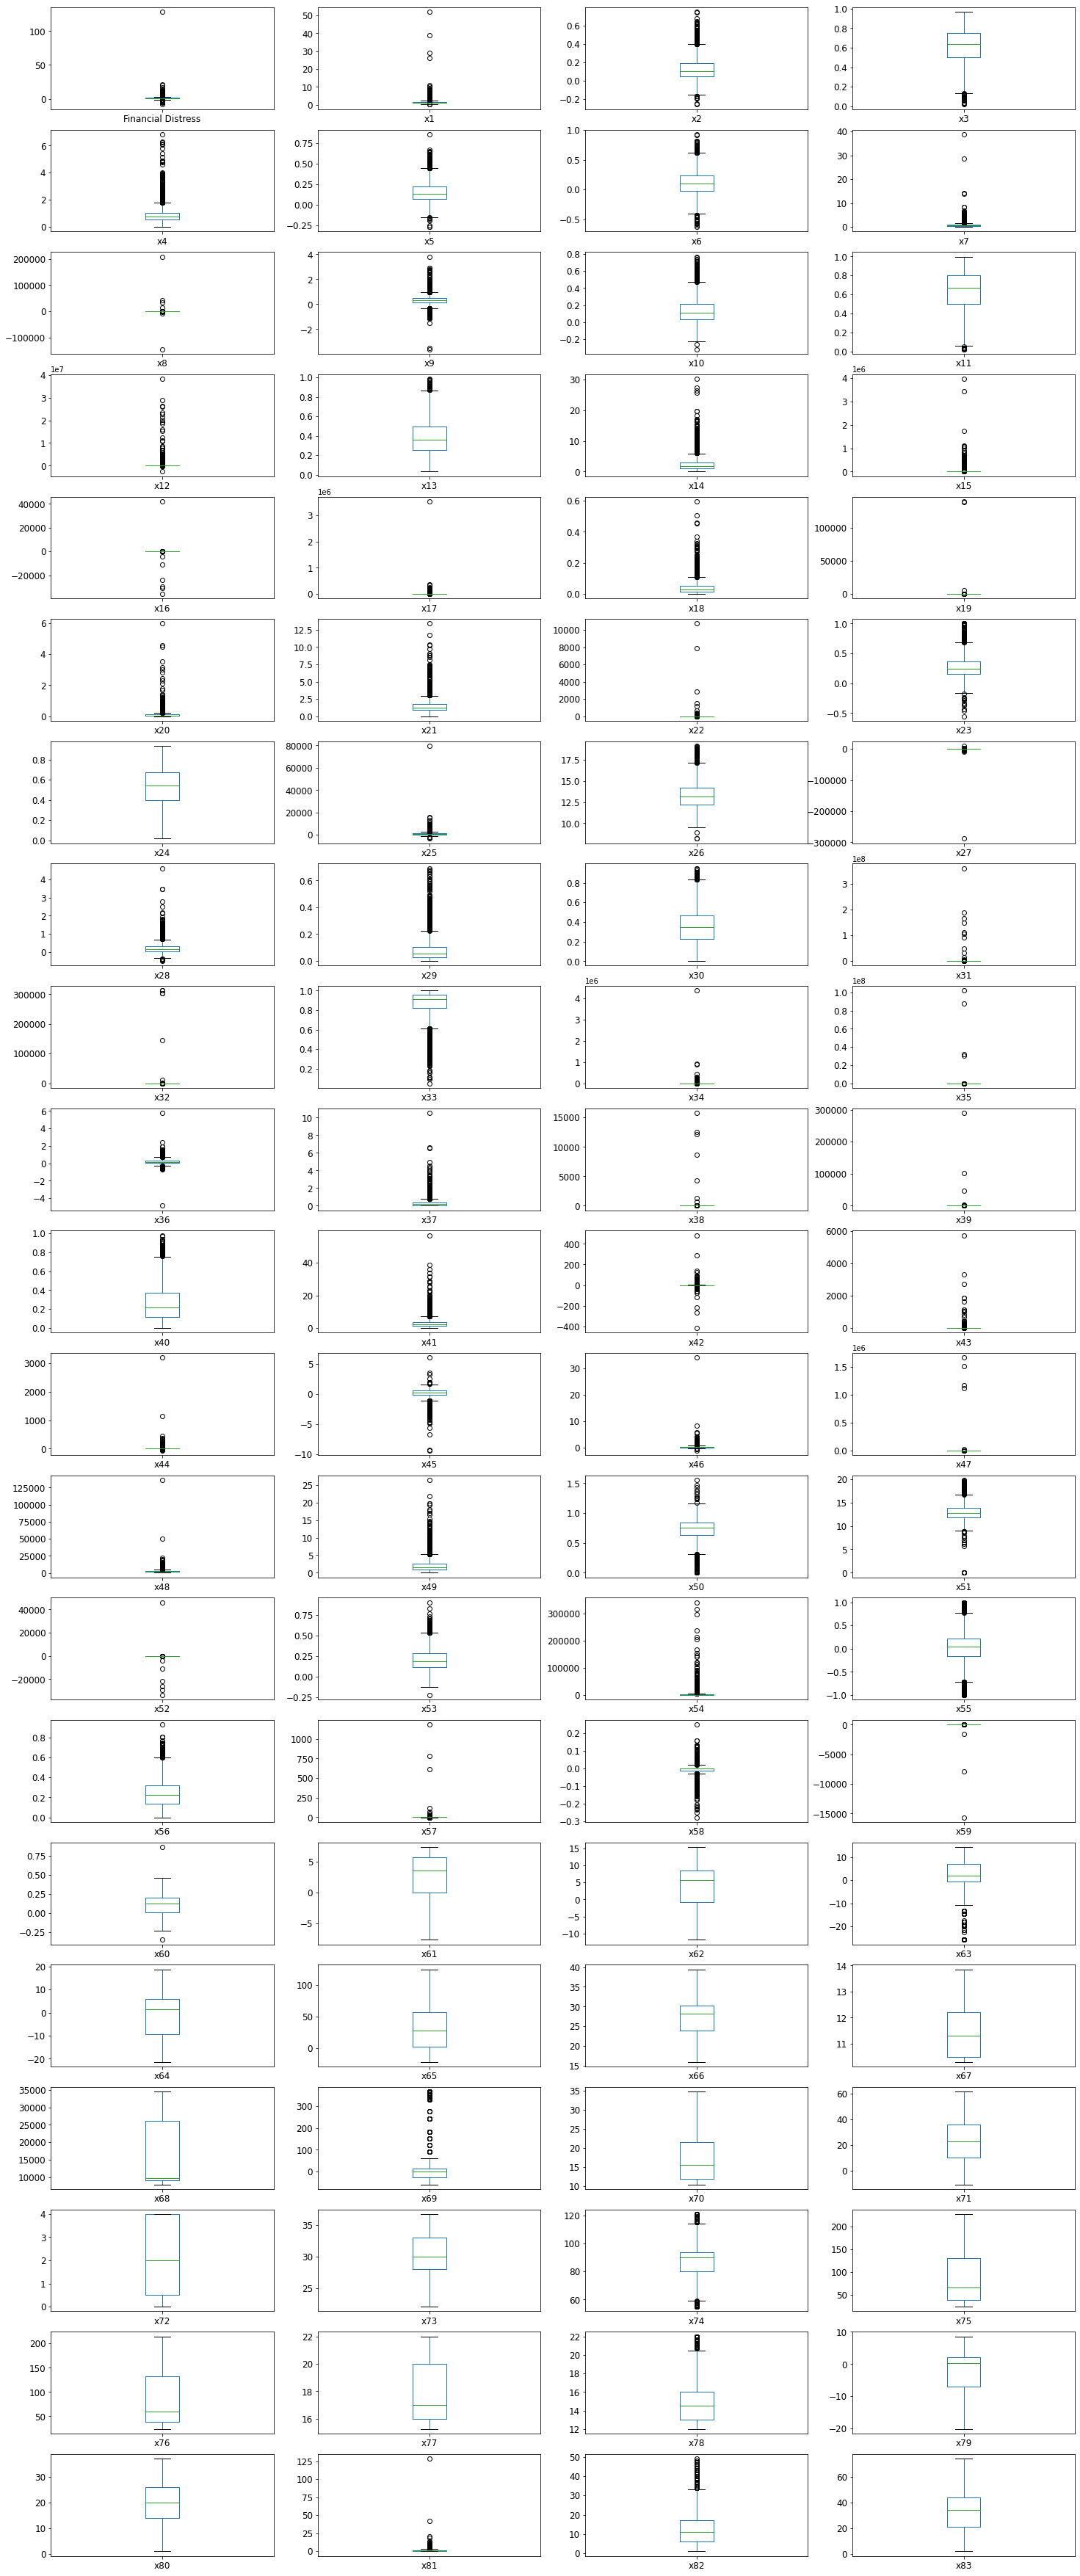

In [ ]:
df1.plot(kind='box', subplots=True, layout=(23,4), sharex=False, sharey=False, fontsize= 12, figsize = (25, 70))
plt.show()